In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as st
from matplotlib import pyplot as plt

In [49]:
math = pd.read_csv("student-mat.csv",sep=";")
portugese = pd.read_csv("student-por.csv",sep=";")
merged = pd.concat([math,portugese])

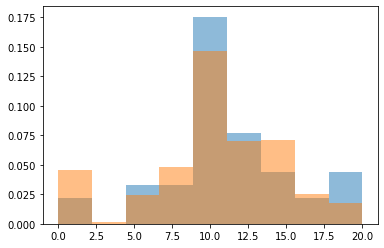

Together 11.0 
Apart 11


In [48]:
# Lepsze wyniki z matematyki jeśli rodzice są razem?
together = math[math["Pstatus"] == "T"]["G3"]
apart = math[math["Pstatus"] == "A"]["G3"]
bins = np.linspace(0,20,10)
plt.hist(apart,bins,alpha = 0.5,density=True)
plt.hist(together,bins,alpha = 0.5,density=True)
plt.show() 
# Prawie pomijalne różnice, ale całkiem sporo więcej dzieci z rodzicami w separacji ma oceny w najwyższym możliwym przedziale
print("Together",st.median(together),"\nApart",st.median(apart))
# Mediana dla obu jest taka sama, więc można powiedzieć że nie ma większych różnic

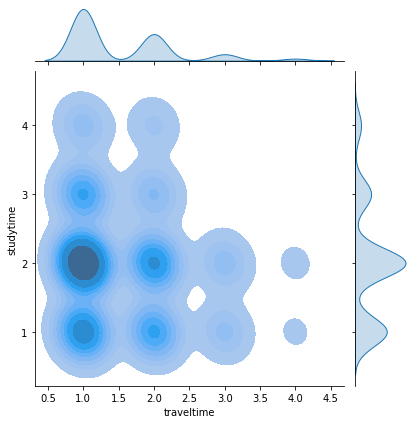

In [72]:
# Korelacja między studytime a traveltime?
d = merged[["traveltime","studytime"]]
sns.jointplot(kind="kde",fill=True,data=d,x="traveltime",y="studytime",)
# Bardzo granularne dane - jeśli jest zależność to pewnie widać ją dopiero na dokładniejszych danych

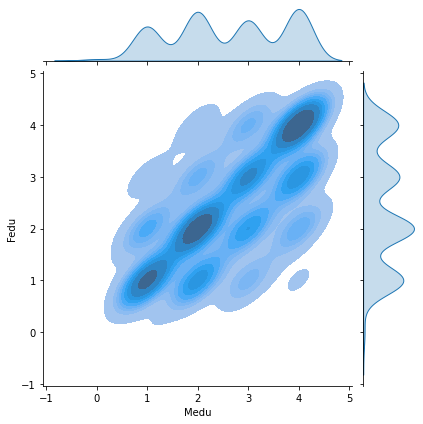

In [66]:
# Korelacja między edukacjami rodziców? Czy lepiej wyształceni ludzie dobierają się w pary?
d = merged[["Medu","Fedu"]]
sns.jointplot(kind="kde",fill=True,data=d,x="Medu",y="Fedu")
# Znowu granularne dane, ale wygląda na to że korelacja istnieje,
#  oraz że kobiety trochę częściej są z lepiej wykształconymi mężczyznami niż na mężczyźni są z lepiej wyszktałconymi kobietami 

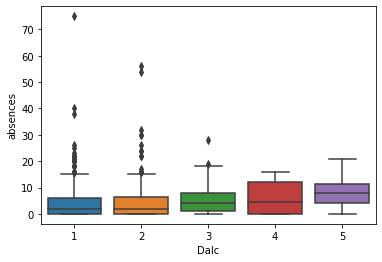

In [71]:
# Czy ilość alkoholu spożywana podczas tygodnia jest związana ze zwiększoną liczbą nieobecności?

d = merged[["Dalc","absences"]]
sns.boxplot(data=d,x="Dalc",y="absences")
# Oczywiście, ale mniej niż można by się spodziewać

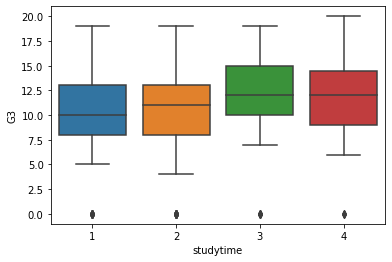

In [74]:
# Jaka jest zależność między czasem nauki a końcową oceną z matematyki?
d = math[["studytime","G3"]]
sns.boxplot(data=d,x="studytime",y="G3")
# Zadziwiająco niewielka - osoby (z grupy 1) uczące się ponad osiem razy dłużej 
#  niż osoby z grupy 4 mają niewielkie różnice w rozkładzie ocen, 
#  mając w 50% przypadków tylko mniej więcej 1 punkt więcej
#  Morał - nie opłaca się uczyć